# Оценка тональности комментариев RuTube

**Описание проекта**: проект посвящен созданию сервиса, который автоматически анализирует тональность комментариев под видео на RuTube. Основной целью является разработка платформы, где пользователь вводит ссылку на видео, а сервис возвращает сводную оценку тональности комментариев — будь то положительные, нейтральные или негативные реакции.  

**Природа данных**: для реализации сервиса в проекте были вручную собраны данные — комментарии с RuTube — с помощью собственного парсера, код которого можно найти в соседней тетрадке. Этот `парсинг` обеспечил гибкость в сборе данных и позволил адаптировать их для дальнейшей обработки и обучения модели. Далее `данные были размечены вручную`. С правилами разметки также можно ознакомиться в данном репозитории.

**Кому это может быть полезно**:  
* *Создателям контента*: RuTube-блогеры и создатели видео часто сталкиваются с большим количеством комментариев, которые трудно проанализировать вручную. Сервис поможет выявить преобладающее мнение аудитории и лучше понять реакцию на контент. Оценка тональности позволяет авторам оперативно адаптировать свой стиль, выбирать более популярные темы или корректировать подход к зрителям.

* *Маркетологам и брендам*: Многие компании используют RuTube для продвижения товаров и услуг, выкладывая рекламные ролики или сотрудничая с популярными блогерами. Сервис тонального анализа комментариев помогает маркетологам оценить восприятие рекламных кампаний и реакцию целевой аудитории. Это особенно важно для улучшения коммуникационной стратегии и поддержания положительного имиджа бренда.

* *Аналитикам и исследователям*: Исследователи могут использовать сервис для проведения качественного анализа отзывов на видеоконтент, будь то социальные или коммерческие исследования. Анализ тональности также полезен в изучении массовых тенденций и настроений, например, в изучении общественного мнения о социально-значимых темах, обсуждаемых на RuTube.

* *Пользователям и зрителям*: В будущем сервис может быть полезен обычным зрителям, которые хотят узнать тональность обсуждений по определенной теме или автору, прежде чем вовлекаться в комментарии или делиться видео.

**Цель данной тетрадки** — исследовать собранные данные и построить модель для оценки тональности. На основе анализа и обработки комментариев будет выбрана модель машинного обучения, способная предсказывать эмоциональную окраску текста, что станет ядром будущего сервиса.  

**В ходе проекта выполнено**:  
`1. Загрузка данных`: загружены необходимые библиотеки, создан ряд вспомогательных функций, загружены тренировочные и тестовые данные.

`2. EDA`: проанализированы исходные данные.

   * Данные изучены на пропуски и явные дубликаты: пропуски не обнаружены, дубликаты сохранены для отражения реальной популярности фраз и улучшения оценок частотности в TF-IDF
   * Оценена разметка данных: 
    	* дисбаланс оценок не выявлен;
    	* для всех типов тональности построены облака слов - найдены самые популярные токены, характеризующие каждый класс по отдельности;
        * получены оценки от предобученной модели с платформы HuggingFace - accuracy предобученной модели равно 0.59.
              
`3. Обучение`: в процессе обучения подобраны гиперпараметры подготовки данных и моделей с помощью OptunaSearchCV. Для подбора гиперпараметров модели градиентного бустинга использовались вычисления на удаленном сервере - средства GPU от Google Colab. Подбор гиперпараметров логистической регрессии проводился локально.
   * Для подбора гиперпараметров и оптимизации выбрана метрика ROC-AUC, поскольку важно, чтобы модель хорошо отличала каждый класс по отдельности.
     В ходе обучения применялись три подхода к подготовке данных:
     * ***Подход №1 N-grams + Bag of Words***:  
        	* ROC-AUC на кросс валидации логистической регрессии составил 0.78  
        	* ROC-AUC на кросс валидации CatBoostClassifier составил 0.84  
     * ***Подход №2 N-grams + TF-IDF (TF-IDF 2-грамм и 3-грамм)***:  
        	* ROC-AUC на кросс валидации логистической регрессии составил 0.83  
        	* ROC-AUC на кросс валидации CatBoostClassifier составил 0.84
     * ***Подход №3 BERT***:  
        	* ROC-AUC на кросс валидации логистической регрессии составил 0.87  
        	* ROC-AUC на кросс валидации CatBoostClassifier составил 0.91

`4. Тестирование лучшей модели`:

   * Тестирование: во всех трех подходах подготовки данных, лучшей моделью оказалась CatBoostClassifier. Лучше всего она себя показала с эмбеддингами от BERT. В ходе тестирование получены следующие оценки:
     
        	* ROC-AUC на тестовой выборке: 0.919
        	* Accuracy на тестовой выборке: 0.781
     
   * Анализ результата: построена матрица ошибок - чаще всего модель ошибается, помечая нейтральные комментарии как положительные, немного реже - отрицательные, как нейтральные. В целом, модель хорошо предсказывает каждый класс.

## Загрузка данных

### Установка библиотек

In [1]:
!pip install -q optuna
!pip install -q optuna-integration[sklearn]


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re
import torch
import optuna
import warnings
import pickle

from wordcloud import WordCloud
from transformers import AutoModelForSequenceClassification, BertTokenizerFast, pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, confusion_matrix
from optuna.integration import OptunaSearchCV
from optuna import distributions
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

DATA_PATH_TRAIN = 'rutube_comments_train.csv'
DATA_PATH_TEST = 'rutube_comments_test.csv'

RANDOM_STATE = 42

warnings.filterwarnings("ignore")

In [3]:
spacy.cli.download("ru_core_news_sm")
nlp = spacy.load("ru_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


### Создание функций

In [4]:
nlp.Defaults.stop_words.remove('не') # удалим частицу 'не' из стоп-слов

In [5]:
# Функция create_wordcloud_from_comments лемматизирует текст и строит облако слов
def create_wordcloud_from_comments(data, comment_column, title):
    # Лемматизация комментариев
    lemmas = []
    for doc in nlp.pipe(data[comment_column].astype(str)):
        lemmas.extend([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

    # Объединяем все леммы в один текст для облака слов
    lemmas_text = " ".join(lemmas)

    # Создание облака слов
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(lemmas_text)

    # Отображение облака слов
    plt.figure(figsize=(8, 4))
    title_sting = 'Облако слов для ' + title
    plt.title(title_sting)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Функция lemmatize_comments лемматизирует комментарии
def lemmatize_comments(data, text_column):
    # Лемматизация комментариев и создание нового списка
    lemmatized_texts = []
    for doc in nlp.pipe(data[text_column].astype(str)):
        lemmas = [
            token.lemma_ for token in doc
            if not token.is_stop and not token.is_punct and re.fullmatch(r'[А-Яа-я]+', token.lemma_)
        ]
        lemmatized_texts.append(" ".join(lemmas))

    # Создаем новый столбец с лемматизированными комментариями
    data['lemmatized_comments'] = lemmatized_texts

    return data

# Функция plot_pie_chart cтроит круговую диаграмму для указанного столбца
def plot_pie_chart(df, column_name):
    # Считаем количество уникальных значений в столбце
    values_counts = df[column_name].value_counts()
    
    # Построение круговой диаграммы
    plt.figure(figsize=(8, 6))
    plt.pie(
        values_counts,
        labels=values_counts.index,
        autopct='%1.1f%%',  # Процентное соотношение с одним знаком после запятой
        startangle=140,     # Начальный угол для распределения сегментов
        colors=plt.cm.Paired.colors[:len(values_counts)]  # Различные цвета для классов
    )
    
    plt.legend(values_counts.index, title=column_name, bbox_to_anchor=(1, 1))
    plt.title(f"Распределение по '{column_name}'")
    plt.show()

# Функция model_comparison строит столбчатые диаграммы - результаты валидационных метрик
def model_comparison(catboost_scores, logreg_scores, approaches):
    x = np.arange(len(approaches))
    width = 0.35  # Ширина столбцов
    
    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, catboost_scores, width, label='CatBoost', color='#32648E')
    bars2 = ax.bar(x + width/2, logreg_scores, width, label='Логистическая регрессия', color='#22A785')
    
    ax.set_xlabel('Подходы')
    ax.set_ylabel('Значения метрики')
    ax.set_title('Сравнение метрик моделей CatBoost и Логистической регрессии')
    ax.set_xticks(x)
    ax.set_xticklabels(approaches)
    ax.legend()
    
    # Отображение значений над столбцами
    for bar in bars1 + bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.show()

### Загрузка данных

Загрузим данные, полученные путем парсинга. Данные csv файл можно найти в ...

In [6]:
rutube_comments_train = pd.read_csv(DATA_PATH_TRAIN)
rutube_comments_test = pd.read_csv(DATA_PATH_TEST)

In [7]:
rutube_comments_train.shape

(3887, 2)

In [8]:
rutube_comments_test.shape

(907, 2)

**Итого**: загружены тренировочный и тестовый датасеты.

Изучим 5 случайных объектов тренировочного датасета.

In [9]:
rutube_comments_train.sample(5, random_state=RANDOM_STATE)

,Комментарий RuTube,Оценка комментария
1344,"ты мне нос сломал.Да не плачь,тебе так даже лучше",нейтральный
3824,Хороший фильм на один раз,положительный
3030,Фильм - конченное ...овно. Кто хоть раз на а...,отрицательный
3618,не знаю мне лично фильм понравился люблю такое...,положительный
1813,"Вот это поворот, неожиданно",нейтральный


**Итого**: загружены библиотеки, созданы вспомогательные функции, загружены данные.

## Исследовательский анализ данных

### Изучение данных на пропуски и явные дубликаты

#### Изучим данные на пропуски

In [10]:
rutube_comments_train.isna().sum()

Комментарий RuTube    0
Оценка комментария    0
dtype: int64

In [11]:
rutube_comments_test.isna().sum()

Комментарий RuTube    0
Оценка комментария    0
dtype: int64

**Итого**: пропусков нет.

#### Изучим тренировочные данные на явные дубликаты

In [12]:
rutube_comments_train.duplicated().sum()

92

**Итого**: обнаружены явные дубликаты.

Обнаружены дубликаты. Изучим их.

In [13]:
rutube_comments_train[rutube_comments_train.duplicated()]

,Комментарий RuTube,Оценка комментария
210,Что такое ислам?\n?? Ислам - это не просто еще...,нейтральный
237,Скорее заходи ????я жду именно вас????оцени ви...,нейтральный
243,"Привет! У нас на канале новое видео! залетай, ...",нейтральный
256,Подпишись на канал КИНОДОКТОР ВСЕ ВЗАИМНО! Най...,нейтральный
408,Хороший фильм!,положительный
...,...,...
3760,Что такое ислам?\n?? Ислам - это не просто еще...,нейтральный
3765,Мучас грасиас!,нейтральный
3778,Норм,положительный
3864,Классный фильм,положительный


In [14]:
rutube_comments_train[rutube_comments_train.duplicated()]['Оценка комментария'].value_counts()

Оценка комментария
положительный    39
нейтральный      35
отрицательный    18
Name: count, dtype: int64

**Итого**: некоторые дубликаты - это реклама, которая размечена ранее как "нейтральный комментарий" (см. договоренности по разметке в этом репозитории). Также присутствуют "типичные" оценки по типу "Норм" и "Классный фильм".  
Удалять дубликаты не будем, поскольку модель будет чаще видеть определённые комбинации слов и тональностей, это может улучшить её прогнозируемую силу на данных, содержащих схожие повторы.  Проблемы с одинаковыми объектами в тренировочной и тестовой выборке не должны возникнуть, поскольку тестовая выборка была создана независимо от датасета rutube_comments_train.

### Оценка разметки данных

#### Посмотрим на распределение классов целевой переменной

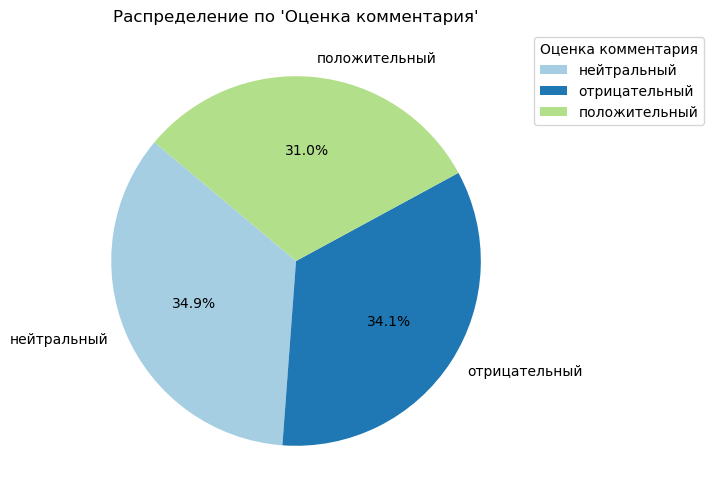

In [15]:
plot_pie_chart(rutube_comments_train, "Оценка комментария")

**Итого**: дисбаланса классов нет - все оценки в примерно одинаковом количестве.

#### Оценим разметку данных с помощью облака слов

Выведем облака слов для положительных, отрицательных и нейтральных комментарием.

In [16]:
negative_comments = rutube_comments_train[rutube_comments_train["Оценка комментария"] == "отрицательный"]
positive_comments = rutube_comments_train[rutube_comments_train["Оценка комментария"] == "положительный"]
neutral_comments = rutube_comments_train[rutube_comments_train["Оценка комментария"] == "нейтральный"]

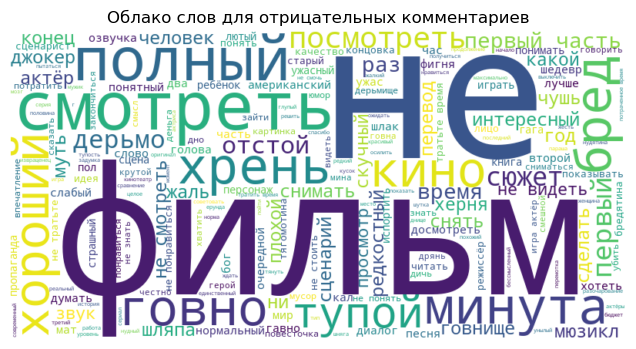

In [17]:
create_wordcloud_from_comments(negative_comments, "Комментарий RuTube", "отрицательных комментариев")

**Итого**: как видно, в отрицательных комментариях действительно содержаться негативные реакции и даже нецензурные выражения.

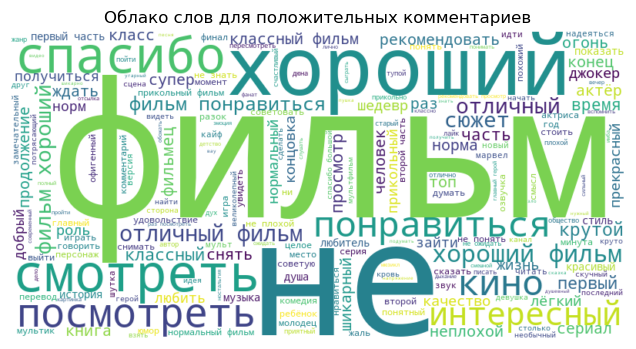

In [18]:
create_wordcloud_from_comments(positive_comments, "Комментарий RuTube", "положительных комментариев")

**Итого**: в облаке положительных комментариев действительно содержаться хорошие оценки.

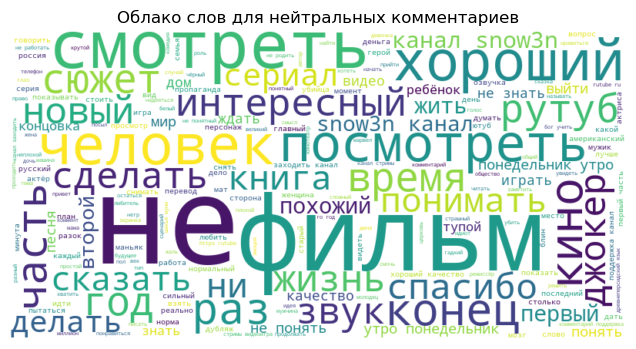

In [19]:
create_wordcloud_from_comments(neutral_comments, "Комментарий RuTube", "нейтральных комментариев")

**Итого**: в облаке нейтральных комментариев нет никакой явной оценки видео, больше похоже на набор случайных слов. В принципе, так и должно было произойти - на то комментарии и нейтральные.

**Выводы по разметке данных**: исходя из слов в облаках, можно сделать вывод, что разметка данных мною удалась - по словам в облаках явно можно понять, что разметка носила осмысленный характер. Поскольку комментарии брались под фильмами 2024 года, то самое популярное слово во всех трех облаках - это `фильм`.

### Оценка будущего моделирования на основе предобученной модели

Попробуем сделать предсказания для корпуса комментариев на предобученной модели. Это даст возможность понять, что моделирование возможно, а также это можно рассмотреть как дополнительный критерий качества разметки. В качестве предобученной модели выберем на HuggingFace модель rubert-base-cased-sentiment, которая обучена на положительных, отрицательных и нейтральных комментариев - прям под нашу задачу.

Загружаем предобученную модель для анализа тональности.

In [20]:
tokenizer = BertTokenizerFast.from_pretrained('blanchefort/rubert-base-cased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('blanchefort/rubert-base-cased-sentiment', return_dict=True)

In [21]:
def get_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)  # Ограничение длины
    with torch.no_grad():
        outputs = model(**inputs)
    scores = outputs.logits[0].numpy()
    sentiment = ["нейтральный", "положительный", "отрицательный"][scores.argmax()]
    return sentiment

In [22]:
rutube_comments_train['sentiment'] = rutube_comments_train['Комментарий RuTube'].apply(get_sentiment)

In [23]:
rutube_comments_train.sample(5, random_state=RANDOM_STATE)

,Комментарий RuTube,Оценка комментария,sentiment
1344,"ты мне нос сломал.Да не плачь,тебе так даже лучше",нейтральный,отрицательный
3824,Хороший фильм на один раз,положительный,положительный
3030,Фильм - конченное ...овно. Кто хоть раз на а...,отрицательный,отрицательный
3618,не знаю мне лично фильм понравился люблю такое...,положительный,положительный
1813,"Вот это поворот, неожиданно",нейтральный,нейтральный


Для общей картины посчитаем accuracy.

In [24]:
acc = rutube_comments_train[rutube_comments_train['Оценка комментария']==rutube_comments_train['sentiment']].shape[0]/rutube_comments_train.shape[0]

In [25]:
print(f'Accuracy предобученной модели {acc:.2f}')

Accuracy предобученной модели 0.59


**Итого**: accuracy на всем корпусе составило 0.59.

Для того, чтобы лучше понять причину довольно посредственного accuracy, рассчитаем accuracy по всем оценкам отдельно.

In [26]:
negative_comments = rutube_comments_train[rutube_comments_train["Оценка комментария"] == "отрицательный"]
positive_comments = rutube_comments_train[rutube_comments_train["Оценка комментария"] == "положительный"]
neutral_comments = rutube_comments_train[rutube_comments_train["Оценка комментария"] == "нейтральный"]

In [27]:
acc_neg = negative_comments[negative_comments['Оценка комментария']==negative_comments['sentiment']].shape[0]/negative_comments.shape[0]
acc_pos = positive_comments[positive_comments['Оценка комментария']==positive_comments['sentiment']].shape[0]/positive_comments.shape[0]
acc_neu = neutral_comments[neutral_comments['Оценка комментария']==neutral_comments['sentiment']].shape[0]/neutral_comments.shape[0]

In [28]:
print(f'Accuracy на отрицательных комментариях {acc_neg:.2f}')
print(f'Accuracy на положительных комментариях {acc_pos:.2f}')
print(f'Accuracy на нейтральных комментариях {acc_neu:.2f}')

Accuracy на отрицательных комментариях 0.70
Accuracy на положительных комментариях 0.53
Accuracy на нейтральных комментариях 0.53


**Итого**: Accuracy в 0.59 на всем корпусе комментариев возникнуло из-за обсуждения сюжета - по своим правилам разметки, обсуждение сюжета, без явной оценки сюжета, размечалось классом "нейтральный", а RuBERT эту особенность не учитывает. Об этом свидетельствуют оценки выше. Также RuBert довольно плохо обрабатывает некоторые положительные комментарии - например, комментарии "Как же я кайфанула))))", "Хороший добрый фильмец" и "Добрый, детский фильм" RuBert отметил классом "отрицательные". Убедиться в этом можно ниже.

In [29]:
positive_comments[positive_comments['sentiment']=='отрицательный'].head()

,Комментарий RuTube,Оценка комментария,sentiment
2,Как же я кайфанула)))),положительный,отрицательный
14,какого хрена нельзя здесь создавать плейлисты(...,положительный,отрицательный
26,"какой классный фильм, вначале так нудно было, ...",положительный,отрицательный
27,"Добрый, детский фильм.",положительный,отрицательный
63,??????????Лайк?? просмотр?? и??и Всем привет!??,положительный,отрицательный


## Обучение  

В процессе обучения будем подбирать гиперпараметры с помощью OptunaSearchCV, по умолчанию используем 10 попыток для подбора. Для подбора гиперпараметров логистической регресси я буду использовать вычислительные мощности своего ноутбука, а для подбора гиперпараметров CatBoostClassifier я буду использовать GPU на Google Colab. Код подбора гиперпараметров CatBoostClassofier будет показан ниже в ячейках Markdown, также в репозитории будет отдельная тетрадка, выгруженная с Google Colab.

### Выбор метрики

Перед нами **задача многоклассой классификации**. Из исследовательского анализа данных было определено, что дисбаланса между классами нет. Очень хотелось бы, чтобы **модель хорошо отличала каждый класс**, поэтому для этой задачи выберем метрику **ROC-AUC**. В данном случае, выбор метрики оправдан по нескольким причинам:  
1) ROC-AUC показывает, насколько уверенно модель различает между классами
2) Также хотелось бы сравнить несколько моделей, построенных далее, учитывающих вероятность принадлежности к классу. ROC-AUC будет полезной метрикой, чтобы оценить их различающую способность в дополнение к accuracy

Адаптируем метрику ROC-AUC под задачу многоклассовой классификации. Для этого используем подход One Vs Rest (Один против всех). Т.е Преобразуем многоклассовую задачу в несколько бинарных задач, где каждый класс поочередно сравнивается со всеми остальными.

In [30]:
multi_class_scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')

### Лемматизируем корпус комментариев

In [31]:
rutube_comments_train = rutube_comments_train.drop('sentiment', axis=1)
rutube_comments_train = rutube_comments_train.reset_index(drop=True)

In [32]:
lemm_comments_train = lemmatize_comments(rutube_comments_train, 'Комментарий RuTube')

In [33]:
lemm_comments_train.head()

,Комментарий RuTube,Оценка комментария,lemmatized_comments
0,Это пушка!!!??,положительный,пушка
1,"я еще не досмотрела, но ведь, посмотрите, а Би...",нейтральный,не досмотреть посмотреть битлджус мужик лишний...
2,Как же я кайфанула)))),положительный,кайфанула
3,говнище и бред!,отрицательный,говнище бред
4,Фильм очень прикольный. Его сложно будет понят...,положительный,фильм прикольный сложный понять не смотреть ча...


In [34]:
lemm_comments_train = lemm_comments_train.drop('Комментарий RuTube', axis=1)

In [35]:
lemm_comments_train.isna().sum()

Оценка комментария     0
lemmatized_comments    0
dtype: int64

In [36]:
lemm_comments_train = lemm_comments_train.reset_index(drop=True)

**Итого**: комментарии лемматизированны.

### Поделим тренировочную выборку на признак и таргет.

In [37]:
X_train_lemm = lemm_comments_train.drop('Оценка комментария', axis=1)
y_train = lemm_comments_train['Оценка комментария']

In [38]:
X_train_lemm.isna().sum()

lemmatized_comments    0
dtype: int64

Сделаем серии вместо датафреймов.

In [39]:
X_train_lemm = pd.Series(X_train_lemm['lemmatized_comments'])

In [40]:
X_train_lemm.shape

(3887,)

In [41]:
#X_train_lemm.to_pickle("X_train_lemm.pkl")

**Итого**: созданы тренировочная и тестовая выборки.

### Закодируем целевую переменную с помощью LabelEncoder

In [42]:
label_encoder = LabelEncoder()

In [43]:
y_train_label = label_encoder.fit_transform(y_train)

In [44]:
y_train_label[:10]

array([2, 0, 2, 1, 2, 2, 0, 1, 2, 0])

In [45]:
y_train.head(10)

0    положительный
1      нейтральный
2    положительный
3    отрицательный
4    положительный
5    положительный
6      нейтральный
7    отрицательный
8    положительный
9      нейтральный
Name: Оценка комментария, dtype: object

**Итого**: 0 - нейтральный, 1 - отрицательный, 2 - положительный.

In [46]:
y_train_label = pd.Series(y_train_label)

In [47]:
#y_train_label.to_pickle("y_train_label.pkl")

### Подход №1: N-grams + Bag of Words

Вспомним природу данных - это **короткие комментарии**, в которых довольно **часто есть ошибки**. Исходя из этой особенности данных разумно использовать n-граммы букв и отдельные токены (слова). **N-граммы букв помогут узнавать слова с ошибками**, а **отдельные слова могут явно задавать оценку** (вспомним облака слов - положительные и отрицательные комментарии имеют очень много непересекающихся слов, поэтому Bag of Words также оправдан).  
Ещё одной ключевой особенностью решения является отбрасывание слишком частых и слишком редких слов и n-грамм букв. Зачем так делать? - Опять же вспомним, что комментарии брались под фильмами 2024 года, а самые популярные слова во всех облаках - это "фильм" и "смотреть". Хочется построить модель, которая будет хорошо работать не только с комментариями под фильмами, поэтому от этих слов нужно избавиться. Также есть очень редкие слова и n-граммы - дополнительные признаки лишь усложнят модель, а ценность таких признаков крайне мала, поэтому от них тоже избавимся.

Построим пайплайн подготовки данных. Сделаем это по двум причинам:  
1) Пайплайны с подготовкой данных можно удобно применять с подбором гиперпараметров
2) Если результат нас удовлетворит, то полный пайплайн (подготовка данных + обученная модель) можно выгрузить в формате pickle и далее обращаться с помощью метода predict.

Построим пайплайн для подготовки данных по `подходу №1`. Подход называется N-grams + Bag of Words, поэтому совместим эти два подхода с помощью FeatureUnion.

In [48]:
preprocess_1 = Pipeline([
    ('features', FeatureUnion([
        ('word_vectorizer', CountVectorizer(analyzer='word')), # Bag of Words
        ('char_vectorizer', CountVectorizer(analyzer='char', ngram_range=(2, 3)))  # 2-граммы и 3-граммы
    ]))
])

#### Применим подход №1 и найдем лучшие гиперпараметры логистической регрессии

Построим пайплайн для логистической регрессии.

In [49]:
pipeline_1_logreg = Pipeline([
    ('preprocess', preprocess_1),
    ('model', LogisticRegression(random_state=RANDOM_STATE))
])

Построим сетку для перебора гиперпараметров, задав такие настройки:  
* исключение слов и n-грамм, встречающихся более чем в 80–95% объектов
* исключение слов и n-грамм, встречающихся реже чем в 20–60 объектах
* подбор количества итераций логистической регрессии в диапазоне от 100 до 1000

In [50]:
parameters_1_logreg = {
    'preprocess__features__word_vectorizer__max_df': distributions.FloatDistribution(0.8, 0.95),
    'preprocess__features__word_vectorizer__min_df': distributions.IntDistribution(40, 100),
    'preprocess__features__char_vectorizer__max_df': distributions.FloatDistribution(0.8, 0.95),
    'preprocess__features__char_vectorizer__min_df': distributions.IntDistribution(40, 100),
    'model__max_iter': distributions.IntDistribution(100, 1000),
    'model__C': distributions.FloatDistribution(0.001, 10),
    'model__penalty': optuna.distributions.CategoricalDistribution(['l2', 'none'])
}

Найдем лучшие гиперпараметры с помощью Optuna. Кросс-валидацию будем проводить на трех фолдах.

In [51]:
oscv_1_logreg = OptunaSearchCV(
    pipeline_1_logreg,
    parameters_1_logreg,
    scoring=multi_class_scorer,
    random_state=RANDOM_STATE,
    cv=3
)

In [52]:
oscv_1_logreg.fit(X_train_lemm, y_train_label)

[I 2024-11-13 10:28:24,208] A new study created in memory with name: no-name-9036556c-f4b8-4d80-993b-9f32bde47b54
[I 2024-11-13 10:28:28,618] Trial 0 finished with value: 0.7787496233599898 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.8682051578332058, 'preprocess__features__word_vectorizer__min_df': 90, 'preprocess__features__char_vectorizer__max_df': 0.8103577011310407, 'preprocess__features__char_vectorizer__min_df': 59, 'model__max_iter': 537, 'model__C': 2.9833180520199423, 'model__penalty': 'l2'}. Best is trial 0 with value: 0.7787496233599898.
[I 2024-11-13 10:28:32,356] Trial 1 finished with value: 0.7528146413490076 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.8264331959907711, 'preprocess__features__word_vectorizer__min_df': 59, 'preprocess__features__char_vectorizer__max_df': 0.8523601494817037, 'preprocess__features__char_vectorizer__min_df': 100, 'model__max_iter': 556, 'model__C': 2.371357840202738, 'model__penalty': 'none'}. 

OptunaSearchCV(cv=3,
               estimator=Pipeline(steps=[('preprocess',
                                          Pipeline(steps=[('features',
                                                           FeatureUnion(transformer_list=[('word_vectorizer',
                                                                                           CountVectorizer()),
                                                                                          ('char_vectorizer',
                                                                                           CountVectorizer(analyzer='char',
                                                                                                           ngram_range=(2,
                                                                                                                        3)))]))])),
                                         ('model',
                                          LogisticRegression(random_state=42))]),
               n_jobs=1,
               param_distributions={'model__C': FloatDistribution(high=10.0...
                                    'preprocess__features__char_vectorizer__min_df': IntDistribution(high=100, log=False, low=40, step=1),
                                    'preprocess__features__word_vectorizer__max_df': FloatDistribution(high=0.95, log=False, low=0.8, step=None),
                                    'preprocess__features__word_vectorizer__min_df': IntDistribution(high=100, log=False, low=40, step=1)},
               random_state=42,
               scoring=make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr))

In [53]:
print(f'Лучшие гиперпараметры: {oscv_1_logreg.best_params_}')
print(f'Лучшая метрика на кросс-валидации {oscv_1_logreg.best_score_:.2f}')

Лучшие гиперпараметры: {'preprocess__features__word_vectorizer__max_df': 0.925144786549623, 'preprocess__features__word_vectorizer__min_df': 93, 'preprocess__features__char_vectorizer__max_df': 0.9216233492990875, 'preprocess__features__char_vectorizer__min_df': 67, 'model__max_iter': 677, 'model__C': 3.5552300026034525, 'model__penalty': 'l2'}
Лучшая метрика на кросс-валидации 0.78


**Итого**: результат ROC-AUC на кросс-валидации составил 0.78.

#### Применим подход №1 и найдем лучшие гиперпараметры модели градиентного бустинга

Используем построенный ранее пайплайн подготовки, а также добавим CatBoostClassifier. Инициализируем CatBoostClassifier с параметрами loss_function='MultiClass' (обучение для многоклассовой задачи) и eval_metric='MultiClass'.

```python
pipeline_1_catboost = Pipeline([
    ('preprocess', preprocess_1),
    ('model', CatBoostClassifier(loss_function='MultiClass', 
                       eval_metric='MultiClass', 
                       random_state=RANDOM_STATE, 
                       task_type='GPU', 
                       verbose=False))
])
```

Построим сетку для перебора гиперпараметров, задав такие настройки:  
* исключение слов и n-грамм, встречающихся более чем в 80–95% объектов
* исключение слов и n-грамм, встречающихся реже чем в 20–60 объектах
* подбор глубины деревьев от 4 до 10
* подбор силы регуляризации
* подбор "температуры" (используем более разнообразные выборки для построения деревьев)

```python
parameters_1_catboost = {
    'preprocess__features__word_vectorizer__max_df': distributions.FloatDistribution(0.8, 0.95),
    'preprocess__features__word_vectorizer__min_df': distributions.IntDistribution(40, 100),
    'preprocess__features__char_vectorizer__max_df': distributions.FloatDistribution(0.8, 0.95),
    'preprocess__features__char_vectorizer__min_df': distributions.IntDistribution(40, 100),
    'model__depth': optuna.distributions.IntDistribution(4, 10),
    'model__l2_leaf_reg': optuna.distributions.FloatDistribution(1e-2, 10, log=True),
    'model__bagging_temperature': optuna.distributions.FloatDistribution(0, 1)
}
```

Найдем лучшие гиперпараметры.

```python
oscv_1_catboost = OptunaSearchCV(
    pipeline_1_catboost,
    parameters_1_catboost,
    scoring=multi_class_scorer,
    random_state=RANDOM_STATE,
    cv=3
)
```

```python
oscv_1_catboost.fit(X_train_lemm, y_train_label)
```
```
[I 2024-11-11 14:02:50,493] A new study created in memory with name: no-name-85699e16-935c-4563-9149-3c60e213cb1f
[I 2024-11-11 14:03:34,392] Trial 0 finished with value: 0.8425809913008032 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.8682051578332058, 'preprocess__features__word_vectorizer__min_df': 90, 'preprocess__features__char_vectorizer__max_df': 0.8103577011310407, 'preprocess__features__char_vectorizer__min_df': 59, 'model__depth': 7, 'model__l2_leaf_reg': 0.0784846803977368, 'model__bagging_temperature': 0.21242627399222258}. Best is trial 0 with value: 0.8425809913008032.
[I 2024-11-11 14:05:12,267] Trial 1 finished with value: 0.838570364714928 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.8250120256954713, 'preprocess__features__word_vectorizer__min_df': 50, 'preprocess__features__char_vectorizer__max_df': 0.8477817864832906, 'preprocess__features__char_vectorizer__min_df': 61, 'model__depth': 10, 'model__l2_leaf_reg': 0.3311721767807895, 'model__bagging_temperature': 0.23705948996927073}. Best is trial 0 with value: 0.8425809913008032.
[I 2024-11-11 14:05:48,033] Trial 2 finished with value: 0.8277101021701591 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.8583879818517908, 'preprocess__features__word_vectorizer__min_df': 68, 'preprocess__features__char_vectorizer__max_df': 0.9285451895053534, 'preprocess__features__char_vectorizer__min_df': 99, 'model__depth': 7, 'model__l2_leaf_reg': 7.19681335292731, 'model__bagging_temperature': 0.45699918904456305}. Best is trial 0 with value: 0.8425809913008032.
[I 2024-11-11 14:06:54,380] Trial 3 finished with value: 0.8383220616671031 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.9386715777655763, 'preprocess__features__word_vectorizer__min_df': 93, 'preprocess__features__char_vectorizer__max_df': 0.8136263803906097, 'preprocess__features__char_vectorizer__min_df': 67, 'model__depth': 9, 'model__l2_leaf_reg': 3.0441907521800937, 'model__bagging_temperature': 0.5231105620516908}. Best is trial 0 with value: 0.8425809913008032.
[I 2024-11-11 14:07:15,359] Trial 4 finished with value: 0.8346371063942707 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.8150130420631228, 'preprocess__features__word_vectorizer__min_df': 82, 'preprocess__features__char_vectorizer__max_df': 0.8743223171336878, 'preprocess__features__char_vectorizer__min_df': 72, 'model__depth': 5, 'model__l2_leaf_reg': 0.1382288555762552, 'model__bagging_temperature': 0.7568975107185656}. Best is trial 0 with value: 0.8425809913008032.
[I 2024-11-11 14:07:33,693] Trial 5 finished with value: 0.8360758014244049 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.8043624133393673, 'preprocess__features__word_vectorizer__min_df': 84, 'preprocess__features__char_vectorizer__max_df': 0.9301384117249135, 'preprocess__features__char_vectorizer__min_df': 69, 'model__depth': 5, 'model__l2_leaf_reg': 0.05801134514017164, 'model__bagging_temperature': 0.6310352531309374}. Best is trial 0 with value: 0.8425809913008032.
[I 2024-11-11 14:08:08,489] Trial 6 finished with value: 0.8393723455923091 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.9361554623544142, 'preprocess__features__word_vectorizer__min_df': 95, 'preprocess__features__char_vectorizer__max_df': 0.8208666407941341, 'preprocess__features__char_vectorizer__min_df': 71, 'model__depth': 7, 'model__l2_leaf_reg': 0.2648786565101281, 'model__bagging_temperature': 0.8342985769974867}. Best is trial 0 with value: 0.8425809913008032.
[I 2024-11-11 14:08:33,619] Trial 7 finished with value: 0.8346459767886106 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.9327266789504856, 'preprocess__features__word_vectorizer__min_df': 89, 'preprocess__features__char_vectorizer__max_df': 0.8682568233817921, 'preprocess__features__char_vectorizer__min_df': 79, 'model__depth': 6, 'model__l2_leaf_reg': 0.2066393076905885, 'model__bagging_temperature': 0.0075511985216114574}. Best is trial 0 with value: 0.8425809913008032.
[I 2024-11-11 14:09:17,236] Trial 8 finished with value: 0.8277482341954987 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.8157585827226341, 'preprocess__features__word_vectorizer__min_df': 69, 'preprocess__features__char_vectorizer__max_df': 0.8292080981844706, 'preprocess__features__char_vectorizer__min_df': 99, 'model__depth': 8, 'model__l2_leaf_reg': 0.04786907593839939, 'model__bagging_temperature': 0.7186651170409628}. Best is trial 0 with value: 0.8425809913008032.
[I 2024-11-11 14:10:55,192] Trial 9 finished with value: 0.8230461700658803 and parameters: {'preprocess__features__word_vectorizer__max_df': 0.9489110898461743, 'preprocess__features__word_vectorizer__min_df': 91, 'preprocess__features__char_vectorizer__max_df': 0.8510773386641057, 'preprocess__features__char_vectorizer__min_df': 87, 'model__depth': 10, 'model__l2_leaf_reg': 0.011526115862768655, 'model__bagging_temperature': 0.41001388535525196}. Best is trial 0 with value: 0.8425809913008032.
```

```python
print(f'Лучшие гиперпараметры: {oscv_1_catboost.best_params_}')
print(f'Лучшая метрика на кросс-валидации {oscv_1_catboost.best_score_:.2f}')
```
```
Лучшие гиперпараметры: {'preprocess__features__word_vectorizer__max_df': 0.8682051578332058, 'preprocess__features__word_vectorizer__min_df': 90, 'preprocess__features__char_vectorizer__max_df': 0.8103577011310407, 'preprocess__features__char_vectorizer__min_df': 59, 'model__depth': 7, 'model__l2_leaf_reg': 0.0784846803977368, 'model__bagging_temperature': 0.21242627399222258}
Лучшая метрика на кросс-валидации 0.84
```

**Итого**: ROC-AUC на кросс-валидации составила 0.84.

### Подход №2: N-grams + TF-IDF

В это подходе попробуем использовать TF-IDF биграмм и триграмм букв. Т.е подготовленные данные представляют из себя значения TF-IDF биграмм и триграмм без самих биграмм и триграмм (если использовать вместе, то, очевидно, возникнет мультиколлинеарность признаков, ведь каждой биграмме/триграмме соответсвует единственное значение TF-IDF)

Напишем пайплайн подготовки данных.

In [54]:
preprocess_2 = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(2, 3))) # считаем TF-IDF для биграмм и триграмм
])

#### Применим подход №2 и найдем лучшие гиперпараметры логистической регрессии

In [55]:
pipeline_2_logreg = Pipeline([
    ('preprocess', preprocess_2),
    ('model', LogisticRegression(random_state=RANDOM_STATE))
])

Построим сетку для перебора гиперпараметров, задав такие настройки:  
* Исключение значений TF-IDF для слишком редких биграмм и триграмм (слишком редкими и частыми будем считать прежние диапазоны)
* подбор количества итераций логистической регрессии в диапазоне от 100 до 1000

In [56]:
parameters_2_logreg = {
    'preprocess__tfidf__max_df': distributions.FloatDistribution(0.8, 0.95),
    'preprocess__tfidf__min_df': distributions.IntDistribution(40, 100),
    'model__max_iter': distributions.IntDistribution(100, 1000),
    'model__C': distributions.FloatDistribution(0.001, 10),
    'model__penalty': optuna.distributions.CategoricalDistribution(['l2', 'none'])
}

Найдем лучшие гиперпараметры.

In [57]:
oscv_2_logreg = OptunaSearchCV(
    pipeline_2_logreg,
    parameters_2_logreg,
    scoring=multi_class_scorer,
    random_state=RANDOM_STATE,
    cv=3
)

In [58]:
oscv_2_logreg.fit(X_train_lemm, y_train_label)

[I 2024-11-13 10:29:03,339] A new study created in memory with name: no-name-ccd7ba98-06f4-4a43-8360-0bf4a2396f08
[I 2024-11-13 10:29:04,875] Trial 0 finished with value: 0.8305038274535231 and parameters: {'preprocess__tfidf__max_df': 0.8682051578332058, 'preprocess__tfidf__min_df': 90, 'model__max_iter': 162, 'model__C': 3.1951530631466336, 'model__penalty': 'l2'}. Best is trial 0 with value: 0.8305038274535231.
[I 2024-11-13 10:29:07,062] Trial 1 finished with value: 0.7542210074497276 and parameters: {'preprocess__tfidf__max_df': 0.8318639410988334, 'preprocess__tfidf__min_df': 50, 'model__max_iter': 258, 'model__C': 3.1861338869761493, 'model__penalty': 'none'}. Best is trial 0 with value: 0.8305038274535231.
[I 2024-11-13 10:29:10,438] Trial 2 finished with value: 0.7313255196499107 and parameters: {'preprocess__tfidf__max_df': 0.8760026921335784, 'preprocess__tfidf__min_df': 54, 'model__max_iter': 450, 'model__C': 4.727898624227827, 'model__penalty': 'none'}. Best is trial 0 wit

OptunaSearchCV(cv=3,
               estimator=Pipeline(steps=[('preprocess',
                                          Pipeline(steps=[('tfidf',
                                                           TfidfVectorizer(analyzer='char',
                                                                           ngram_range=(2,
                                                                                        3)))])),
                                         ('model',
                                          LogisticRegression(random_state=42))]),
               n_jobs=1,
               param_distributions={'model__C': FloatDistribution(high=10.0, log=False, low=0.001, step=None),
                                    'model__max_iter': IntDistribution(high=1000, log=False, low=100, step=1),
                                    'model__penalty': CategoricalDistribution(choices=('l2', 'none')),
                                    'preprocess__tfidf__max_df': FloatDistribution(high=0.95, log=False, low=0.8, step=None),
                                    'preprocess__tfidf__min_df': IntDistribution(high=100, log=False, low=40, step=1)},
               random_state=42,
               scoring=make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr))

In [59]:
print(f'Лучшие гиперпараметры: {oscv_2_logreg.best_params_}')
print(f'Лучшая метрика на кросс-валидации {oscv_2_logreg.best_score_:.2f}')

Лучшие гиперпараметры: {'preprocess__tfidf__max_df': 0.8743223171336878, 'preprocess__tfidf__min_df': 72, 'model__max_iter': 293, 'model__C': 3.802615508516576, 'model__penalty': 'l2'}
Лучшая метрика на кросс-валидации 0.83


**Итого**: метрика ROC-AUC на кросс-валидации составила 0.83. Очевидно, подход оказал влияние на логистическую регрессию. 

#### Применим подход №2 и найдем лучшие гиперпараметры модели градиентного бустинга

Построим пайплайн.

```python
pipeline_2_catboost = Pipeline([
    ('preprocess', preprocess_2),
    ('model', CatBoostClassifier(loss_function='MultiClass', 
                                 eval_metric='MultiClass', 
                                 random_state=RANDOM_STATE, 
                                 task_type='GPU', 
                                 verbose=False))
])
```

Построим сетку для перебора гиперпараметров, задав такие настройки:  
* Исключение значений TF-IDF для слишком редких биграмм и триграмм (слишком редкими и частыми будем считать прежние диапазоны)
* подбор глубины деревьев от 4 до 10
* подбор силы регуляризации
* подбор "температуры" (используем более разнообразные выборки для построения деревьев)

```python
parameters_2_catboost = {
    'preprocess__tfidf__max_df': distributions.FloatDistribution(0.8, 0.95),
    'preprocess__tfidf__min_df': distributions.IntDistribution(40, 100),
    'model__depth': optuna.distributions.IntDistribution(4, 10),
    'model__l2_leaf_reg': optuna.distributions.FloatDistribution(1e-2, 10, log=True),
    'model__bagging_temperature': optuna.distributions.FloatDistribution(0, 1)
} 
```

Найдем лучшие гиперпараметры.

```python
oscv_2_catboost = OptunaSearchCV(
    pipeline_2_catboost,
    parameters_2_catboost,
    scoring=multi_class_scorer,
    random_state=RANDOM_STATE,
    cv=3
)
```

```python
oscv_2_catboost.fit(X_train_lemm, y_train_label)
```
```
[I 2024-11-11 14:11:05,347] A new study created in memory with name: no-name-7c4fe939-ace4-4196-b4d8-f61d3f12cfc0
[I 2024-11-11 14:11:26,879] Trial 0 finished with value: 0.8227209440965675 and parameters: {'preprocess__tfidf__max_df': 0.8682051578332058, 'preprocess__tfidf__min_df': 90, 'model__depth': 4, 'model__l2_leaf_reg': 0.09085351895012907, 'model__bagging_temperature': 0.48518719297596336}. Best is trial 0 with value: 0.8227209440965675.
[I 2024-11-11 14:11:58,376] Trial 1 finished with value: 0.8407312569999696 and parameters: {'preprocess__tfidf__max_df': 0.8447392447047696, 'preprocess__tfidf__min_df': 52, 'model__depth': 5, 'model__l2_leaf_reg': 0.033780332484163816, 'model__bagging_temperature': 0.3185452432219371}. Best is trial 1 with value: 0.8407312569999696.
[I 2024-11-11 14:12:56,062] Trial 2 finished with value: 0.8263839533734839 and parameters: {'preprocess__tfidf__max_df': 0.8523601494817037, 'preprocess__tfidf__min_df': 100, 'model__depth': 7, 'model__l2_leaf_reg': 0.051425493719553815, 'model__bagging_temperature': 0.38925321234527177}. Best is trial 1 with value: 0.8407312569999696.
[I 2024-11-11 14:17:04,805] Trial 3 finished with value: 0.8282534942561304 and parameters: {'preprocess__tfidf__max_df': 0.8709105704204595, 'preprocess__tfidf__min_df': 92, 'model__depth': 10, 'model__l2_leaf_reg': 0.23879404075245253, 'model__bagging_temperature': 0.9523800798479475}. Best is trial 1 with value: 0.8407312569999696.
[I 2024-11-11 14:21:08,312] Trial 4 finished with value: 0.8275622964190662 and parameters: {'preprocess__tfidf__max_df': 0.8685498783566845, 'preprocess__tfidf__min_df': 96, 'model__depth': 10, 'model__l2_leaf_reg': 0.01872956141813076, 'model__bagging_temperature': 0.4553655200041342}. Best is trial 1 with value: 0.8407312569999696.
[I 2024-11-11 14:22:05,781] Trial 5 finished with value: 0.8289868970753128 and parameters: {'preprocess__tfidf__max_df': 0.9212913004694594, 'preprocess__tfidf__min_df': 90, 'model__depth': 7, 'model__l2_leaf_reg': 0.01996461047825737, 'model__bagging_temperature': 0.7008267271590665}. Best is trial 1 with value: 0.8407312569999696.
[I 2024-11-11 14:22:34,695] Trial 6 finished with value: 0.8301432103053745 and parameters: {'preprocess__tfidf__max_df': 0.8743223171336878, 'preprocess__tfidf__min_df': 72, 'model__depth': 5, 'model__l2_leaf_reg': 0.1382288555762552, 'model__bagging_temperature': 0.7568975107185656}. Best is trial 1 with value: 0.8407312569999696.
[I 2024-11-11 14:26:56,108] Trial 7 finished with value: 0.8302979823887383 and parameters: {'preprocess__tfidf__max_df': 0.8043624133393673, 'preprocess__tfidf__min_df': 84, 'model__depth': 10, 'model__l2_leaf_reg': 0.26858370778354906, 'model__bagging_temperature': 0.24249359416402205}. Best is trial 1 with value: 0.8407312569999696.
[I 2024-11-11 14:31:29,070] Trial 8 finished with value: 0.8290135883429354 and parameters: {'preprocess__tfidf__max_df': 0.8381756467901709, 'preprocess__tfidf__min_df': 78, 'model__depth': 10, 'model__l2_leaf_reg': 5.299102290634588, 'model__bagging_temperature': 0.1391109386275602}. Best is trial 1 with value: 0.8407312569999696.
[I 2024-11-11 14:32:38,081] Trial 9 finished with value: 0.8317970327157916 and parameters: {'preprocess__tfidf__max_df': 0.8777576800771155, 'preprocess__tfidf__min_df': 69, 'model__depth': 7, 'model__l2_leaf_reg': 3.1834331250409296, 'model__bagging_temperature': 0.884844526336571}. Best is trial 1 with value: 0.8407312569999696.
```

```python
print(f'Лучшие гиперпараметры: {oscv_2_catboost.best_params_}')
print(f'Лучшая метрика на кросс-валидации {oscv_2_catboost.best_score_:.2f}')
```
```
Лучшие гиперпараметры: {'preprocess__tfidf__max_df': 0.8447392447047696, 'preprocess__tfidf__min_df': 52, 'model__depth': 5, 'model__l2_leaf_reg': 0.033780332484163816, 'model__bagging_temperature': 0.3185452432219371}
Лучшая метрика на кросс-валидации 0.84
```

**Итого**: Метрика на кросс-валидации 0.84, влияние другого подхода не повлияло на метрику.

### Подход №3: BERT

Получим эмбеддинги с помощью предобученной модели RuBert от DeepPavlov. Модель возвращает эмбеддинги для каждого токена (при разной длине предложения возвращается разное количество эмбеддингов), поэтому мы ограничим длину токенов, а итоговый результат будем усреднять.

Загрузим модель RuBert от DeepPavlov.

In [60]:
rubert_pipe = pipeline("feature-extraction", model="DeepPavlov/rubert-base-cased-conversational")

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased-conversational were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Преобразуем тренировочные данные в эмбеддинги. Для обучения этой модели **не будем использовать уже лемматизированные комментарии**.

In [61]:
rutube_comments_train.head()

,Комментарий RuTube,Оценка комментария,lemmatized_comments
0,Это пушка!!!??,положительный,пушка
1,"я еще не досмотрела, но ведь, посмотрите, а Би...",нейтральный,не досмотреть посмотреть битлджус мужик лишний...
2,Как же я кайфанула)))),положительный,кайфанула
3,говнище и бред!,отрицательный,говнище бред
4,Фильм очень прикольный. Его сложно будет понят...,положительный,фильм прикольный сложный понять не смотреть ча...


In [62]:
X_train = rutube_comments_train.drop(['Оценка комментария', 'lemmatized_comments'], axis=1)                                     

In [63]:
X_train.head()

,Комментарий RuTube
0,Это пушка!!!??
1,"я еще не досмотрела, но ведь, посмотрите, а Би..."
2,Как же я кайфанула))))
3,говнище и бред!
4,Фильм очень прикольный. Его сложно будет понят...


Создадим функцию для получения эмбеддингов. Сократим комментарии до 512 символов.

In [64]:
def get_average_embedding(comment):
    embeddings = rubert_pipe(comment[:512])[0]
    return np.mean(embeddings[1:-1], axis=0) # усредняем с первого, поскольку нулевой - показатель размерности 

In [65]:
def create_embeddings_df(comments_series):
    # Применяем get_average_embedding ко всем комментариям
    embeddings = comments_series.apply(get_average_embedding)
    
    # Извлекаем массивы эмбеддингов из Series и формируем DataFrame
    embeddings_df = pd.DataFrame(embeddings.tolist(), index=comments_series.index)
    embeddings_df.columns = [f"embedding_{i}" for i in range(embeddings_df.shape[1])]
    
    return embeddings_df

In [66]:
X_train_bert = create_embeddings_df(X_train['Комментарий RuTube'])

In [67]:
X_train_bert.shape

(3887, 768)

In [68]:
X_train_bert.head()

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_758,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767
0,-0.504641,-0.233505,0.639951,-0.066592,0.364267,1.263998,0.940735,0.267666,-0.590703,0.646024,...,0.195214,1.020222,-1.433715,-0.764953,0.157131,0.310580,0.044016,1.412764,0.161786,-0.094626
1,-0.291139,-0.360141,-0.016272,-0.570844,0.083912,0.655268,0.480027,0.100380,0.607182,0.307070,...,-0.418116,-0.016707,-1.192877,0.152845,0.865718,0.021958,0.205061,0.485227,0.178334,-0.582408
2,0.491792,-0.482384,-0.006477,1.147053,-0.088107,0.639690,-0.639552,-0.703718,-0.247541,0.685628,...,0.470385,0.235107,-0.057627,-0.563450,0.078974,-0.491394,1.128431,-0.493944,0.090925,0.131741
3,-0.308080,0.066670,-1.130417,0.585710,0.437479,0.964606,-0.099412,0.151958,0.885810,0.015793,...,-0.285119,0.192393,-0.517052,0.200269,0.386341,-0.106624,-0.521604,0.268278,0.037221,-0.087667
4,-0.242632,-0.444915,0.284799,-0.240497,0.250947,0.858896,0.461499,0.157919,-0.312827,0.202954,...,0.129124,-0.129889,-0.424944,-0.584311,0.471113,-0.020785,-0.277168,0.755969,0.195199,-0.372174


In [69]:
#X_train_bert.to_pickle("X_train_bert.pkl")

#### Применим подход №3 и найдем лучшие гиперпараметры логистической регрессии

Создадим сетку для подбора гиперпараметров. Никаких операций подготовки данных проводить не будем.

In [70]:
parameters_3_logreg = {
    'max_iter': distributions.IntDistribution(100, 1000),
    'C': distributions.FloatDistribution(0.001, 10),
    'penalty': optuna.distributions.CategoricalDistribution(['l2', 'none']),
}

In [71]:
oscv_3_logreg = OptunaSearchCV(
    LogisticRegression(random_state=RANDOM_STATE),
    parameters_3_logreg,
    scoring=multi_class_scorer,
    random_state=RANDOM_STATE,
    cv=3
)

In [72]:
oscv_3_logreg.fit(X_train_bert, y_train_label)

[I 2024-11-13 10:37:02,326] A new study created in memory with name: no-name-e239464b-6098-4ac7-aa00-162471bf00f3
[I 2024-11-13 10:37:04,507] Trial 0 finished with value: 0.845861607262843 and parameters: {'max_iter': 509, 'C': 8.326487691117283, 'penalty': 'none'}. Best is trial 0 with value: 0.845861607262843.
[I 2024-11-13 10:37:14,914] Trial 1 finished with value: 0.8697589184287913 and parameters: {'max_iter': 537, 'C': 2.9833180520199423, 'penalty': 'l2'}. Best is trial 1 with value: 0.8697589184287913.
[I 2024-11-13 10:37:17,445] Trial 2 finished with value: 0.845861607262843 and parameters: {'max_iter': 258, 'C': 3.1861338869761493, 'penalty': 'none'}. Best is trial 1 with value: 0.8697589184287913.
[I 2024-11-13 10:37:19,947] Trial 3 finished with value: 0.845861607262843 and parameters: {'max_iter': 556, 'C': 2.371357840202738, 'penalty': 'none'}. Best is trial 1 with value: 0.8697589184287913.
[I 2024-11-13 10:37:22,106] Trial 4 finished with value: 0.845861607262843 and par

OptunaSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=1,
               param_distributions={'C': FloatDistribution(high=10.0, log=False, low=0.001, step=None),
                                    'max_iter': IntDistribution(high=1000, log=False, low=100, step=1),
                                    'penalty': CategoricalDistribution(choices=('l2', 'none'))},
               random_state=42,
               scoring=make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr))

In [73]:
print(f'Лучшие гиперпараметры: {oscv_3_logreg.best_params_}')
print(f'Лучшая метрика на кросс-валидации {oscv_3_logreg.best_score_:.2f}')

Лучшие гиперпараметры: {'max_iter': 537, 'C': 2.9833180520199423, 'penalty': 'l2'}
Лучшая метрика на кросс-валидации 0.87


**Итого**: ROC-AUC на кросс-валидации составил 0.87.

#### Применим подход №3 и найдем лучшие гиперпараметры модели градиентного бустинга

```python
parameters_3_catboost = {
    'depth': optuna.distributions.IntDistribution(4, 10),
    'l2_leaf_reg': optuna.distributions.FloatDistribution(1e-2, 10, log=True),
    'bagging_temperature': optuna.distributions.FloatDistribution(0, 1)
}
```

```python
oscv_3_catboost = OptunaSearchCV(
    CatBoostClassifier(loss_function='MultiClass', 
                       eval_metric='MultiClass', 
                       random_state=RANDOM_STATE, 
                       task_type='GPU', 
                       verbose=False),
    parameters_3_catboost,
    scoring=multi_class_scorer,
    random_state=RANDOM_STATE,
    cv=3
)
```

```python
oscv_3_catboost.fit(X_train_bert, y_train_label)
```
```
[I 2024-11-11 14:32:49,572] A new study created in memory with name: no-name-168e399a-3e31-4c0e-92e2-9fec6edbe720
[I 2024-11-11 14:34:30,314] Trial 0 finished with value: 0.9017575993494972 and parameters: {'depth': 7, 'l2_leaf_reg': 3.1469953191648936, 'bagging_temperature': 0.0690513408736042}. Best is trial 0 with value: 0.9017575993494972.
[I 2024-11-11 14:35:31,209] Trial 1 finished with value: 0.9054810336402038 and parameters: {'depth': 6, 'l2_leaf_reg': 0.28547072560927855, 'bagging_temperature': 0.29826163136513073}. Best is trial 1 with value: 0.9054810336402038.
[I 2024-11-11 14:36:09,451] Trial 2 finished with value: 0.9034931605835701 and parameters: {'depth': 5, 'l2_leaf_reg': 0.03164029426393974, 'bagging_temperature': 0.17622130660514113}. Best is trial 1 with value: 0.9054810336402038.
[I 2024-11-11 14:37:08,297] Trial 3 finished with value: 0.9054947473122108 and parameters: {'depth': 6, 'l2_leaf_reg': 0.11148154776010387, 'bagging_temperature': 0.9992508603400948}. Best is trial 3 with value: 0.9054947473122108.
[I 2024-11-11 14:38:50,726] Trial 4 finished with value: 0.9024152656560732 and parameters: {'depth': 7, 'l2_leaf_reg': 0.051425493719553815, 'bagging_temperature': 0.38925321234527177}. Best is trial 3 with value: 0.9054947473122108.
[I 2024-11-11 14:40:30,872] Trial 5 finished with value: 0.9039640186751687 and parameters: {'depth': 7, 'l2_leaf_reg': 3.7230921891133786, 'bagging_temperature': 0.9737427100419667}. Best is trial 3 with value: 0.9054947473122108.
[I 2024-11-11 14:42:09,877] Trial 6 finished with value: 0.9020434898794463 and parameters: {'depth': 7, 'l2_leaf_reg': 7.19681335292731, 'bagging_temperature': 0.45699918904456305}. Best is trial 3 with value: 0.9054947473122108.
[I 2024-11-11 14:51:28,568] Trial 7 finished with value: 0.8861951403113033 and parameters: {'depth': 10, 'l2_leaf_reg': 4.499186098408566, 'bagging_temperature': 0.09084253593739844}. Best is trial 3 with value: 0.9054947473122108.
[I 2024-11-11 14:53:08,765] Trial 8 finished with value: 0.9045261850116278 and parameters: {'depth': 7, 'l2_leaf_reg': 2.6657904597610775, 'bagging_temperature': 0.8278239540993878}. Best is trial 3 with value: 0.9054947473122108.
[I 2024-11-11 14:54:50,292] Trial 9 finished with value: 0.903284700149582 and parameters: {'depth': 7, 'l2_leaf_reg': 0.01996461047825737, 'bagging_temperature': 0.7008267271590665}. Best is trial 3 with value: 0.9054947473122108.
```

```python
print(f'Лучшие гиперпараметры: {oscv_3_catboost.best_params_}')
print(f'Лучшая метрика на кросс-валидации {oscv_3_catboost.best_score_:.2f}')
```
```
Лучшие гиперпараметры: {'depth': 6, 'l2_leaf_reg': 0.11148154776010387, 'bagging_temperature': 0.9992508603400948}
Лучшая метрика на кросс-валидации 0.91
```

**Итого**: метрика на кросс-валидации составила 0.91.

## Тестирование лучшей модели

### Изучим результаты кросс-валидации всех моделей

In [74]:
catboost_scores = [0.84, 0.84, 0.91]
logreg_scores = [0.78, 0.83, 0.87]
approaches = ['N-grams + BOW', 'N-grams + TF-IDF', 'BERT']

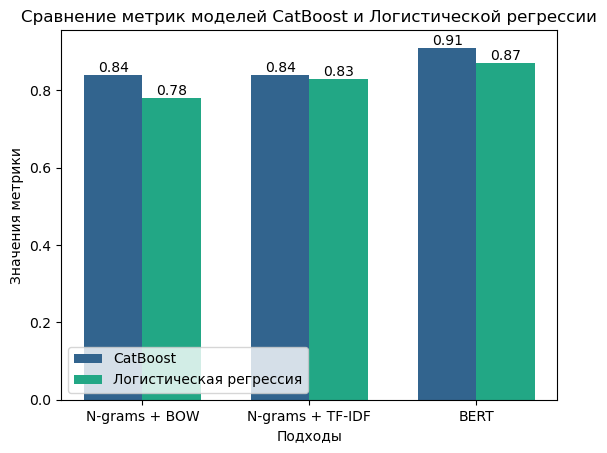

In [75]:
model_comparison(catboost_scores, logreg_scores, approaches)

**Итого**: Во всех трех подходах подготовки данных, лучшей моделью оказалась CatBoostClassifier. Лучше всего она себя показала с эмбеддингами от BERT.

### Посчитаем ROC-AUC на тестовой выборке

Обучим модель с лучшими гиперпараметрами.

In [76]:
clf = CatBoostClassifier(loss_function='MultiClass', 
                         eval_metric='MultiClass', 
                         depth=6, 
                         l2_leaf_reg=0.11148154776010387, 
                         bagging_temperature=0.9992508603400948, 
                         random_state=RANDOM_STATE, 
                         verbose=False)

In [77]:
clf.fit(X_train_bert, y_train_label)

Преобразуем тренировочные данные.

In [78]:
X_test = rutube_comments_test.drop('Оценка комментария', axis=1)
y_test = rutube_comments_test['Оценка комментария']

In [79]:
X_test_bert = create_embeddings_df(X_test['Комментарий RuTube'])

In [80]:
y_test_label = label_encoder.transform(y_test)

Сделаем предсказания и получим метрики ROC-AUC и Accuracy.

In [81]:
y_proba = clf.predict_proba(X_test_bert)
y_pred = clf.predict(X_test_bert)

In [82]:
roc_auc_score_result = roc_auc_score(y_test_label, y_proba, multi_class='ovr')
accuracy = accuracy_score(y_test_label, y_pred)

In [83]:
print(f'ROC-AUC на тестовой выборке: {roc_auc_score_result}')
print(f'Accuracy на тестовой выборке: {accuracy}')

ROC-AUC на тестовой выборке: 0.9196175110065464
Accuracy на тестовой выборке: 0.7816979051819184


**Итого**: ROC-AUC = 0.91, Accuracy = 0.78.

### Анализ результата

Построим матрицу ошибок.

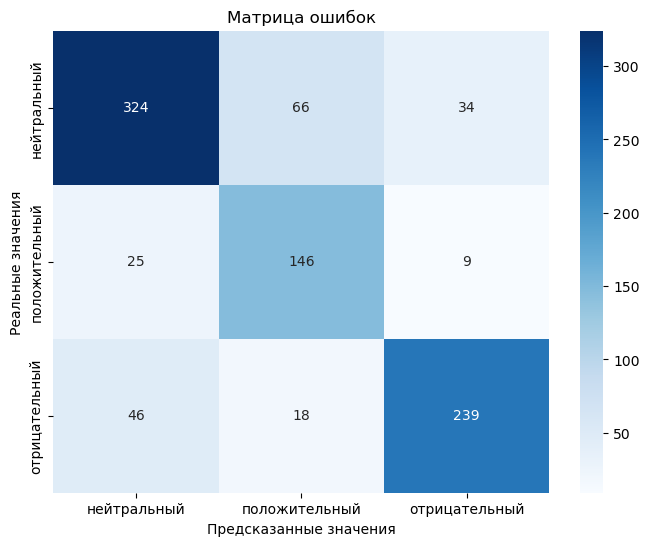

In [84]:
conf_matrix = confusion_matrix(y_test_label, y_pred)
labes = ['нейтральный', 'положительный', 'отрицательный']
# Визуализируем матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labes, yticklabels=labes)
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.title('Матрица ошибок')
plt.show()

**Итого**: модель чаще всего допускает такую ошибку: помечает нейтральные комментарии, как положительный. Немного реже модель помечает отрицательные комментарии, как нейтральные. В целом, модель хорошо предсказывает все классы - элементы главной диагонали матрицы насыщенного цвета.

Выгрузим модель.

In [85]:
with open('catboost_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

**Итого**: модель выгружена.

## Вывод

Построена модель машинного обучения, предсказывающая эмоциональную оценку текста. Исследованы собранные данные. Пройдем по каждому пункту плана и зафиксируем результат:  
1) `Загрузка данных`: загружены необходимые библиотеки, создан ряд вспомогательных функций, загружены тренировочные и тестовые данные.

2) `EDA`: проанализированы исходные данные.

   * Данные изучены на пропуски и явные дубликаты: пропуски не обнаружены, дубликаты сохранены для отражения реальной популярности фраз и улучшения оценок частотности в TF-IDF
   * Оценена разметка данных: 
    	* дисбаланс оценок не выявлен;
    	* для всех типов тональности построены облака слов - найдены самые популярные токены, характеризующие каждый класс по отдельности;
        * получены оценки от предобученной модели с платформы HuggingFace - accuracy предобученной модели равно 0.59.
         
3) `Обучение`: в процессе обучения подобраны гиперпараметры подготовки данных и моделей с помощью OptunaSearchCV. Для подбора гиперпараметров модели градиентного бустинга использовались вычисления на удаленном сервере - средства GPU от Google Colab. Подбор гиперпараметров логистической регрессии проводился локально.
   * Для подбора гиперпараметров и оптимизации выбрана метрика ROC-AUC, поскольку важно, чтобы модель хорошо отличала каждый класс по отдельности.
     В ходе обучения применялись три подхода к подготовке данных:
     * `Подход №1 N-grams + Bag of Words`:  
        	* ROC-AUC на кросс валидации логистической регрессии составил 0.78  
        	* ROC-AUC на кросс валидации CatBoostClassifier составил 0.84  
     * `Подход №2 N-grams + TF-IDF (TF-IDF 2-грамм и 3-грамм)`:  
        	* ROC-AUC на кросс валидации логистической регрессии составил 0.83  
        	* ROC-AUC на кросс валидации CatBoostClassifier составил 0.84
     * `Подход №3 BERT`:  
        	* ROC-AUC на кросс валидации логистической регрессии составил 0.87  
        	* ROC-AUC на кросс валидации CatBoostClassifier составил 0.91

4) `Тестирование лучшей модели`:

   * Тестирование: во всех трех подходах подготовки данных, лучшей моделью оказалась CatBoostClassifier. Лучше всего она себя показала с эмбеддингами от BERT. В ходе тестирование получены следующие оценки:
     
        	* ROC-AUC на тестовой выборке: 0.919
        	* Accuracy на тестовой выборке: 0.781
     
   * Анализ результата: построена матрица ошибок - чаще всего модель ошибается, помечая нейтральные комментарии как положительные, немного реже - отрицательные, как нейтральные. В целом, модель хорошо предсказывает каждый класс.